In [10]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'sign-language-hand-gesture-recognition:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2391489%2F4036559%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240417%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240417T023925Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3De0421c99c1ea1725cd002215ea2fa6bc71005d9b24bf03d7a537f19f3e7d72b0ab5bc6167ec138a8282b5d57c7fa6f090568dd96d3ad6a9f80df399ffe21da569447c079c7bec7f0b014b9ed592b9c448a41271fcfe68e334eea7c771345d6af4b9637dc606bfe5629033d3455d3aa293ef64f6b4cd1e4c545def47992b9acb83d2ee8fc9754f83fbed6e473304a9e68e9e3691cf5f498e77e2c329234b20bc3dc391d39d0c296296c3dca8501ab642bc8412dc17b15e49cc602b1b178ad4f2f7bcc1d173d8dd260b038a14ce9292482fcbcb17a4ee1c5501507dec466025f25d3645d598702371b1acd89c7fc569c7660ad767689949d3f0bf01b0de80c09b2'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1080034268 bytes downloaded
Downloaded and uncompressed: sign-language-hand-gesture-recognition
Data source import complete.


#Final Project
## Saign Language recognetion
### Done BY:
**FATIMA ALMUSAWI (9000400)**<br>
**RAMANDEEP KAUR (8976849)**


In [8]:
import numpy as np
import shutil, os
import pandas as pd
import glob
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Loading the Data

In [11]:
# read label
my_data = pd.read_csv("../input/sign-language-hand-gesture-recognition/asl_alphabets/Training_set.csv")
my_data

,filename,label
0,Image_1.jpg,B
1,Image_2.jpg,P
2,Image_3.jpg,J
3,Image_4.jpg,T
4,Image_5.jpg,B
...,...,...
60895,Image_60896.jpg,S
60896,Image_60897.jpg,I
60897,Image_60898.jpg,X
60898,Image_60899.jpg,Q


In [12]:
# sort label to make it easier to read
sorting_data=my_data.sort_values('label')
sorting_data

,filename,label
28602,Image_28603.jpg,A
31330,Image_31331.jpg,A
31374,Image_31375.jpg,A
7219,Image_7220.jpg,A
31421,Image_31422.jpg,A
...,...,...
13087,Image_13088.jpg,space
45368,Image_45369.jpg,space
19462,Image_19463.jpg,space
45401,Image_45402.jpg,space


In [13]:
# take unique labels
class_names = list(sorting_data.label.unique())
class_names

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

## 2-data preprocessing
### 2.1- organizing data into files:
 organizing files into a directory structure that is more manageable and suitable for training models.
 organizing images into folders by class allows machine learning libraries (like TensorFlow or PyTorch) to more easily load and label the data during training. This structured approach not only helps in handling large datasets efficiently but also in implementing data augmentation and other preprocessing techniques directly during the model training process.

In [14]:
#Define the Path:
newpath = r'./train'
#Check and Create Directory:
if not os.path.exists(newpath):
    os.makedirs(newpath)

"newpath" is a string variable that holds the path to a directory named train in the current working directory.
"os.path.exists(newpath)" checks if this directory already exists.
If the directory does not exist (if not os.path.exists(newpath)), os.makedirs(newpath) is called to create the directory. This ensures that there is a directory named train where subdirectories and files can be stored.

In [15]:
#creating subfolders
for c in class_names:
    dest =  r'./train/'+str(c)
    os.makedirs(dest)
    #Copying Images to the Corresponding Class Folders:
    for i in list(my_data[my_data['label']==c]['filename']): # Image Id
        get_image = os.path.join('../input/sign-language-hand-gesture-recognition/asl_alphabets/train', i) # Path to Images
        move_image_to_cat = shutil.copy(get_image, dest)

In [9]:
# val_newpath = r'./validation'
# if not os.path.exists(val_newpath):
#     os.makedirs(val_newpath)

# for c in class_names:
#     val_dest = os.path.join(val_newpath, str(c))
#     if not os.path.exists(val_dest):
#         os.makedirs(val_dest)

after running theses lines of codes, now the images sorted into folders by category.

In [111]:
# #Define the Path:
# newpath = r'./test'
# #Check and Create Directory:
# if not os.path.exists(newpath):
#     os.makedirs(newpath)

# # Assuming class_names is a list of all class names
# for b in class_names:
#     test_class_dir = os.path.join(newpath, b)
#     if not os.path.exists(test_class_dir):
#         os.makedirs(test_class_dir)


In [112]:

#Set Source and Destination Directories:
# src_dir = "../input/sign-language-hand-gesture-recognition/asl_alphabets/test"
# dst_dir = "./test"
# #Copy Each JPEG File to the Destination Directory:
# for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
#     shutil.copy(jpgfile, dst_dir)

### Data splitting

Splitting Data for Validation from Training
Let's subset the training data to create a validation set. We'll use an 80-20 split

In [16]:
import os
import shutil
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# First split: Separate out the initial training set and a temporary set
train_labels, temp_labels = train_test_split(my_data, test_size=0.30, random_state=42)  # Adjust size as needed

# Second split: Divide the temporary set into validation and test sets
val_labels, test_labels = train_test_split(temp_labels, test_size=0.50, random_state=42)  # Split the remaining 30% into two parts

# Save new train, validation, and test CSV files
train_labels.to_csv('./train.csv', index=False)
val_labels.to_csv('./validation.csv', index=False)
test_labels.to_csv('./test2.csv', index=False)


#### Copy Images to Validation Directories
We will move the corresponding image files for the validation set

In [17]:
# Create the directories if they don't already exist

for c in class_names:
    os.makedirs(os.path.join('./validation', c), exist_ok=True)
    os.makedirs(os.path.join('./test2', c), exist_ok=True)

    # Handle validation files
    val_files = list(val_labels[val_labels['label'] == c]['filename'])
    for filename in val_files:
        src_path = os.path.join('./train', c, filename)
        dest_path = os.path.join('./validation', c, filename)
        if os.path.exists(src_path):  # Ensure the file exists in the source before moving
            shutil.move(src_path, dest_path)

    # Handle test files
    test_files = list(test_labels[test_labels['label'] == c]['filename'])
    for filename in test_files:
        src_path = os.path.join('./train', c, filename)
        dest_path = os.path.join('./test2', c, filename)
        if os.path.exists(src_path):  # Ensure the file exists in the source before moving
            shutil.move(src_path, dest_path)

#### presenting some data to make sure the spllting went smooth, and passing the data tp training and testing

In [18]:
#Reading and Displaying the Training Set:
train=pd.read_csv('../input/sign-language-hand-gesture-recognition/asl_alphabets/Training_set.csv')
train.head()

,filename,label
0,Image_1.jpg,B
1,Image_2.jpg,P
2,Image_3.jpg,J
3,Image_4.jpg,T
4,Image_5.jpg,B


In [19]:
#reading and displaying the validation set
validation=pd.read_csv('./validation.csv')
validation.head()


,filename,label
0,Image_41334.jpg,B
1,Image_35891.jpg,X
2,Image_703.jpg,E
3,Image_56795.jpg,V
4,Image_5978.jpg,G


In [20]:
#Reading and Displaying the Testing Set:
test2=pd.read_csv('./test2.csv')
test2.head()

,filename,label
0,Image_10647.jpg,Z
1,Image_2096.jpg,space
2,Image_20469.jpg,F
3,Image_25681.jpg,C
4,Image_48240.jpg,W


In [21]:
#Saving the DataFrames to New CSV Files:
train.to_csv('./train.csv',index=False)
test2.to_csv('./test2.csv',index=False)

## Exploratory Data Analysis (EDA)
In machine learning, the first step before developing any robust algorithm is to perform a thorough Exploratory Data Analysis (EDA). This analysis is crucial for understanding the data's structure, identifying any biases, and detecting anomalies that could affect model performance. Our project focuses on a dataset of images, each labeled with a hand gesture from the American Sign Language (ASL) alphabet, used for sign language recognition.

The primary objective of this EDA is to meticulously explore the dataset to ensure that the data is not only well-understood but also aptly prepared for the subsequent stages of machine learning modeling. This includes assessing the balance of the dataset, visualizing the data to understand the variability within and across classes, and preparing the data through appropriate preprocessing methods. By doing so, we aim to maximize the effectiveness of our predictive models which will be designed to accurately classify each hand gesture into its respective sign language label.

### Explore the labels
at the beginning we would like to see what labels we have:

In [ ]:
class_names

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

so there are 29 labels

### Basic Data Checks
Shape of the Dataset: Understand how many examples (rows) and features (columns) we have.

In [22]:
print("Train Shape (before split):",train.shape)

print("Train Shape (after split):", train_labels.shape)  # Should reflect an 80% subset
print("Validation Shape:", val_labels.shape)  # Should reflect a 20% subset
print("Test Shape:", test_labels.shape)


Train Shape (before split): (60900, 2)
Train Shape (after split): (42630, 2)
Validation Shape: (9135, 2)
Test Shape: (9135, 2)


### Data Types:
 Check the data types to see if any columns are inappropriately typed and need conversion.

In [101]:
print(train.dtypes)
print(test2.dtypes)


filename    object
label       object
dtype: object
filename    object
label       object
dtype: object


### Missing Values:
Check for missing values and decide on a strategy to handle them (e.g., imputation, deletion)

In [102]:
print(train.isnull().sum())
print(test2.isnull().sum())


filename    0
label       0
dtype: int64
filename    0
label       0
dtype: int64


###  Statistical Summary
This involves looking at the distribution of numerical features and understanding the central tendencies and spread.

In [103]:
print(train.describe())
print(test2.describe())


               filename  label
count             60900  60900
unique            60900     29
top     Image_60900.jpg      B
freq                  1   2100
               filename  label
count              9135   9135
unique             9135     29
top     Image_45164.jpg  space
freq                  1    348


### Distribution of Categorical Data
Since your dataset likely involves categorical data (like labels for hand gestures), check the distribution of these categories.

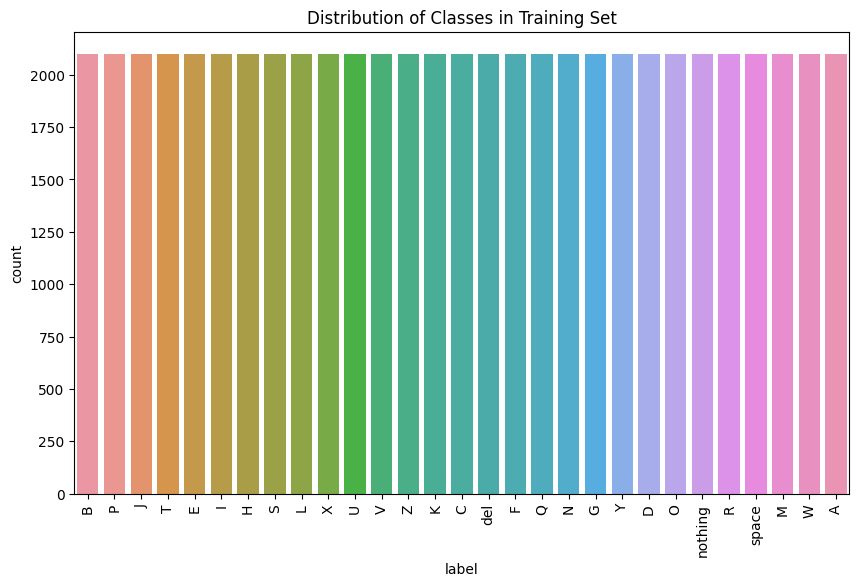

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=train)
plt.title('Distribution of Classes in Training Set')
plt.xticks(rotation=90)
plt.show()


###  Checking for Imbalance in the Data
If some classes are over-represented or under-represented, it might affect the performance of a machine learning model, making it biased towards the more frequent classes

In [ ]:
# Display the number of images per label to see if there's imbalance
label_counts = train['label'].value_counts()
print(label_counts)



label
B          2100
del        2100
W          2100
M          2100
space      2100
R          2100
nothing    2100
O          2100
D          2100
Y          2100
G          2100
N          2100
Q          2100
F          2100
C          2100
P          2100
K          2100
Z          2100
V          2100
U          2100
X          2100
L          2100
S          2100
H          2100
I          2100
E          2100
T          2100
J          2100
A          2100
Name: count, dtype: int64


The above output (the figure and the codes for imbalance in data) indicates that the dataset has a very balanced distribution of labels, with each class having 2100 instances. This is an ideal scenario for machine learning tasks, especially in classification, because it means that the model will not be biased towards more frequently represented classes.

### Data Visualization
lets visualizing some of these images to provide insights into the variability within each class, which is important for understanding how challenging the classification task might be.

Displaying images for the label A


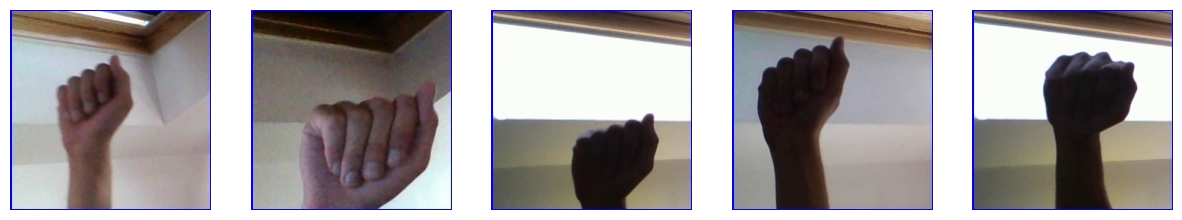

Displaying images for the label X


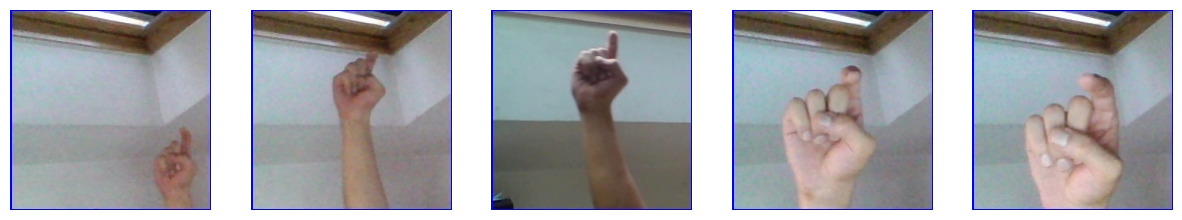

Displaying images for the label Del


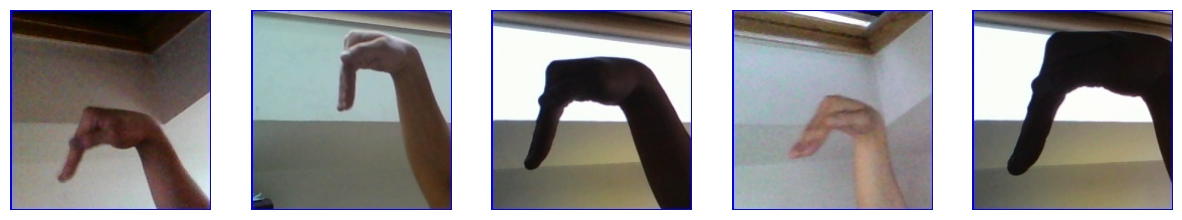

Displaying images for the label nothing


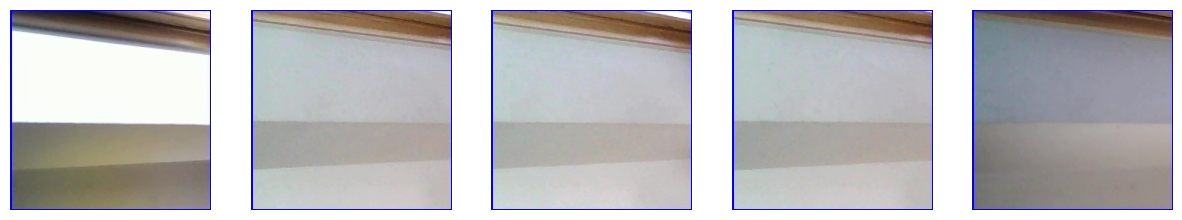

Displaying images for the label space


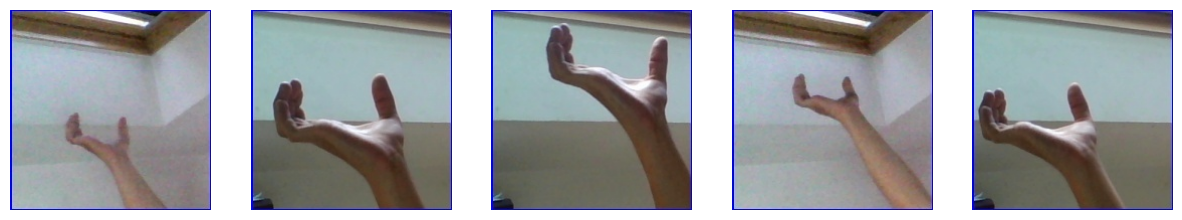

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Function to display images for each label
def display_images(data, path, label, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 10))
    selected_images = data[data['label'] == label]['filename'].sample(num_images)
    for ax, img_filename in zip(axes, selected_images):
        img_path = os.path.join(path, img_filename)
        image = Image.open(img_path)
        ax.imshow(image)
        ax.axis('off')
    plt.show()

# Example of displaying images for the label 'A'
print('Displaying images for the label A')
display_images(train, './data/asl_alphabets/train', 'A')
# Example of displaying images for the label 'X'
print('Displaying images for the label X')
display_images(train, './data/asl_alphabets/train', 'X')
# Example of displaying images for the label 'Del'
print('Displaying images for the label Del')
display_images(train, './data/asl_alphabets/train', 'del')

# Example of displaying images for the label 'nothing'
print('Displaying images for the label nothing')
display_images(train, './data/asl_alphabets/train', 'nothing')

# Example of displaying images for the label 'space'
print('Displaying images for the label space')
display_images(train, './data/asl_alphabets/train', 'space')



#### displaying  distribution and most common colors in the random images

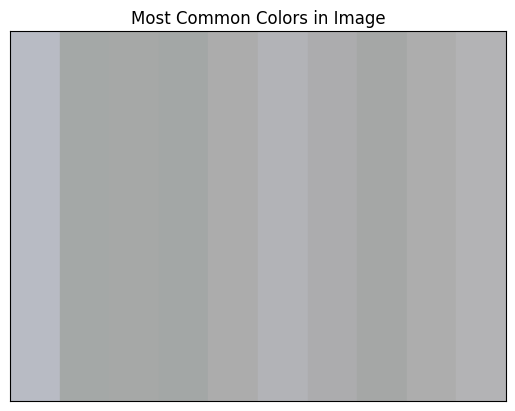

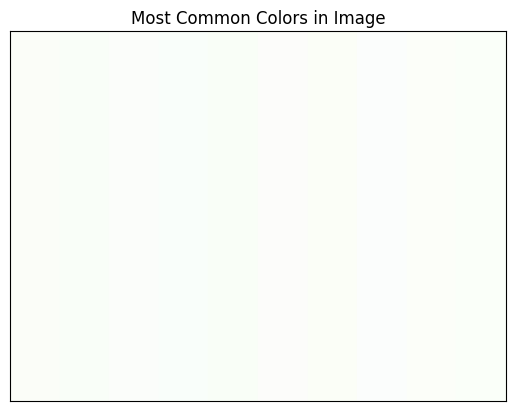

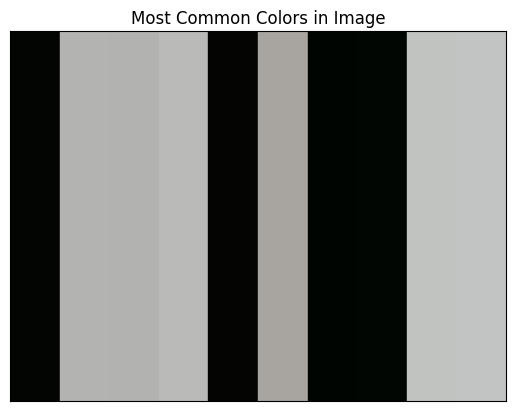

In [ ]:
from collections import defaultdict
import matplotlib.patches as patches

def plot_color_distribution(image_path):
    image = Image.open(image_path)
    pixels = np.array(image)
    colors = defaultdict(int)

    for row in pixels:
        for pixel in row:
            colors[tuple(pixel)] += 1

    # Plotting only the 10 most common colors
    common_colors = sorted(colors, key=colors.get, reverse=True)[:10]
    fig, ax = plt.subplots()

    for i, color in enumerate(common_colors):
        ax.add_patch(patches.Rectangle((i, 0), 1, 1, color=np.array(color)/255))

    ax.set_xlim(0, 10)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Most Common Colors in Image')
    plt.show()

# Example usage
plot_color_distribution('data/asl_alphabets/train/image_50.jpg')

# Example usage
plot_color_distribution('data/asl_alphabets/train/image_20.jpg')
# Example usage
plot_color_distribution('data/asl_alphabets/train/image_1.jpg')


### Data Augmentation
Given that sign language recognition might be sensitive to variations like lighting, angle, and background, consider using data augmentation to make our model more robust to such variations:

In [123]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the data generators for train and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation set

# we have the following directory paths set up
train_dir = './train'
validation_dir = './validation'
test_dir = './test2'

# Create the actual data generators for the train and validation sets
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Create test data generator
test_data = val_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Typically we don't shuffle test data
)


Found 42630 images belonging to 29 classes.
Found 15230 images belonging to 29 classes.
Found 0 images belonging to 29 classes.


## Data Training
Load the Pre-trained Model without the Classification Head
We'll start by loading the Vision Transformer model without its pre-trained classification head. This way, we can add our own output layer suited for the number of classes in the dataset.

#### Data Preparation
we will need to transform the data appropriately for the model and set up the DataLoader for batch processing. PyTorch's torchvision library provides utilities for transforming and loading data effectively.

In [24]:
import os

test_path = 'test2'
classes = [d.name for d in os.scandir(test_path) if d.is_dir()]
print("Classes found:", classes)

for cls in classes:
    class_dir = os.path.join(test_path, cls)
    files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
    print(f"Files in {cls}: {files[:5]}")  # Print first 5 files in each class

# Check if there are any files in one of the class directories
example_class_path = os.path.join(test_path, classes[0])  # Checking the first class directory
example_files = [f for f in os.listdir(example_class_path) if f.endswith(('.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp'))]
print(f"Valid files in {classes[0]}: {example_files[:5]}")  # Print first 5 valid files in the first class


Classes found: ['L', 'G', 'K', 'S', 'nothing', 'D', 'P', 'T', 'N', 'Q', 'H', 'U', 'Y', 'J', 'O', 'B', 'W', 'I', 'M', 'space', 'A', 'E', 'R', 'del', 'Z', 'C', 'F', 'X', 'V']
Files in L: ['Image_26705.jpg', 'Image_263.jpg', 'Image_59978.jpg', 'Image_18300.jpg', 'Image_13735.jpg']
Files in G: ['Image_17568.jpg', 'Image_57664.jpg', 'Image_40437.jpg', 'Image_6189.jpg', 'Image_13990.jpg']
Files in K: ['Image_39482.jpg', 'Image_40540.jpg', 'Image_30435.jpg', 'Image_54178.jpg', 'Image_59058.jpg']
Files in S: ['Image_907.jpg', 'Image_50433.jpg', 'Image_7028.jpg', 'Image_29499.jpg', 'Image_47211.jpg']
Files in nothing: ['Image_45628.jpg', 'Image_5747.jpg', 'Image_12916.jpg', 'Image_2794.jpg', 'Image_24354.jpg']
Files in D: ['Image_42794.jpg', 'Image_1069.jpg', 'Image_49198.jpg', 'Image_52890.jpg', 'Image_36234.jpg']
Files in P: ['Image_3877.jpg', 'Image_18957.jpg', 'Image_51873.jpg', 'Image_34880.jpg', 'Image_34089.jpg']
Files in T: ['Image_4348.jpg', 'Image_7375.jpg', 'Image_7607.jpg', 'Image_3

In [25]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformations for the input data
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to fit model input requirements
    transforms.ToTensor(),  # Convert images to tensor format
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])


# Load datasets
train_dataset = datasets.ImageFolder('train', transform=transform)
valid_dataset = datasets.ImageFolder('validation', transform=transform)
test_dataset =datasets.ImageFolder('test2', transform=transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


#### Model Setup
Initialize your model and move it to the appropriate device (CPU or GPU).

In [23]:
import torch
import torch.nn as nn
from transformers import ViTModel, ViTConfig

class CustomViTModel(nn.Module):
    def __init__(self, num_classes):
        super(CustomViTModel, self).__init__()
        config = ViTConfig.from_pretrained('google/vit-base-patch16-224', output_hidden_states=False)
        self.vit = ViTModel.from_pretrained('google/vit-base-patch16-224', config=config)

        # Freeze all the layers in the base model
        for param in self.vit.parameters():
            param.requires_grad = False

        # Assuming the output feature size from ViT's CLS token is 768
        feature_dim = self.vit.config.hidden_size

        self.fc = nn.Linear(feature_dim, 512)  # Adjust input features to match ViT output
        self.relu = nn.ReLU()
        self.classifier = nn.Linear(512, num_classes)

    def forward(self, inputs):
        outputs = self.vit(inputs)  # Directly pass tensor inputs
        cls_token = outputs.last_hidden_state[:, 0, :]  # Only use the CLS token
        x = self.fc(cls_token)
        x = self.relu(x)
        return self.classifier(x)


In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomViTModel(num_classes=29).to(device)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


3. Define Loss Function and Optimizer
Setting up the loss function and the optimizer. Here, we use CrossEntropyLoss for multi-class classification and Adam optimizer.

In [26]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Learning rate


#### Initialize Variables for Tracking Best Model
Before starting the training loop, initialize variables to track the best model based on the validation loss.

In [27]:
best_val_loss = float('inf')
best_model_path = 'vit_best_model.pth'  # Path where the best model will be saved


#### Training Loop<Br>
Implement the training loop, including validation to monitor the performance on unseen data.<br>
Within the training loop, after the validation phase, compare the current epoch's validation loss with the best validation loss tracked. If the current loss is lower, update the best loss and save the model.<br>
Explanation<br>
Tracking the Best Model: By checking if the validation loss of the current epoch is lower than the best recorded loss (best_val_loss), the model's parameters are saved only when they represent an improvement.
Saving the Model: torch.save is used to save the model's state dictionary to the file specified by best_model_path. The state dictionary includes all model parameters.

#### Vision Transformer (ViT):
The Vision Transformer (ViT) model, originally developed by researchers at Google, applies the principles of transformers—a breakthrough architecture in natural language processing—to the field of image classification. Unlike conventional convolutional neural networks (CNNs) that process images through local filters, ViT treats an image as a sequence of patches and uses self-attention mechanisms to capture complex relationships between these patches across the entire image. This allows ViT to understand broader and more abstract visual patterns effectively.

For sign language image classification, ViT is particularly advantageous because of its ability to focus on the spatial relationships and distinct features within each sign language pose or gesture. Each hand sign involves specific configurations and orientations of fingers and palms, which are crucial for accurate classification. The global receptive field of ViT, facilitated by its self-attention layers, enables it to capture these nuances across the whole image, leading to potentially higher accuracy and better performance than traditional CNNs. This makes the Vision Transformer a compelling choice for tasks like sign language recognition, where precision in interpreting visual details is essential.<br>
**Understanding Vision Transformer Output**
A standard Vision Transformer (ViT) model outputs a sequence of token embeddings. using the default setup, the sequence includes:

A class token (CLS token) embedding, which is typically used for classification tasks.
A set of patch embeddings corresponding to parts of the input image.
For classification, we typically would only use the CLS token's embedding, which is the first token in the sequence output by the ViT model.

References:<br>
[ViT Model Documentation on Hugging Face](https://huggingface.co/docs/transformers/en/model_doc/vit)<br>
[ViT Base Patch16-224 on Hugging Face](https://huggingface.co/google/vit-base-patch16-224)<br>
[An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale - arXiv](https://arxiv.org/abs/2010.11929)


In [28]:
num_epochs = 50

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation phase
    model.eval()  # Set model to evaluation mode
    valid_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_val_loss = valid_loss / len(valid_loader)
    epoch_acc = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Validation Loss: {epoch_val_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

    # Save the model if validation loss has decreased
    if epoch_val_loss < best_val_loss:
        print(f'Validation loss decreased ({best_val_loss:.4f} --> {epoch_val_loss:.4f}). Saving model...')
        best_val_loss = epoch_val_loss
        torch.save(model.state_dict(), best_model_path)


Epoch [1/50], Loss: 0.2359, Validation Loss: 0.0600, Accuracy: 98.23%
Validation loss decreased (inf --> 0.0600). Saving model...
Epoch [2/50], Loss: 0.0529, Validation Loss: 0.0359, Accuracy: 98.88%
Validation loss decreased (0.0600 --> 0.0359). Saving model...
Epoch [3/50], Loss: 0.0364, Validation Loss: 0.0311, Accuracy: 99.03%
Validation loss decreased (0.0359 --> 0.0311). Saving model...
Epoch [4/50], Loss: 0.0305, Validation Loss: 0.0699, Accuracy: 98.05%
Epoch [5/50], Loss: 0.0297, Validation Loss: 0.0273, Accuracy: 99.20%
Validation loss decreased (0.0311 --> 0.0273). Saving model...
Epoch [6/50], Loss: 0.0232, Validation Loss: 0.0642, Accuracy: 98.09%
Epoch [7/50], Loss: 0.0231, Validation Loss: 0.0272, Accuracy: 99.23%
Validation loss decreased (0.0273 --> 0.0272). Saving model...
Epoch [8/50], Loss: 0.0194, Validation Loss: 0.0494, Accuracy: 98.92%
Epoch [9/50], Loss: 0.0223, Validation Loss: 0.0358, Accuracy: 99.13%
Epoch [10/50], Loss: 0.0164, Validation Loss: 0.0714, Accu

KeyboardInterrupt: 

# Plotting Training an Validation acuraccy and Loss

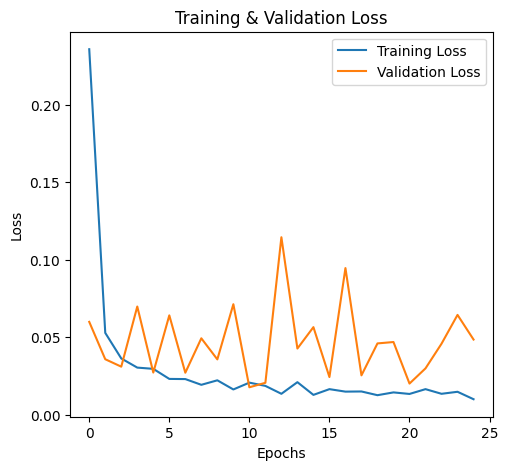

In [29]:
#as we fotgot to save the accuracy and loss metrics at each epoch,we will
#try to make alternative way for  plotting them
#by using printed logs,and plot the metrics manually:
#by Creating lists in Python with these values.
import matplotlib.pyplot as plt

# Data extracted from the training logs
train_losses = [0.2359, 0.0529, 0.0364, 0.0305, 0.0297, 0.0232, 0.0231, 0.0194, 0.0223, 0.0164, 0.0208, 0.0187, 0.0136, 0.0211, 0.0129, 0.0166, 0.0150, 0.0151, 0.0127, 0.0145, 0.0135, 0.0166, 0.0136, 0.0149, 0.0101]
valid_losses = [0.0600, 0.0359, 0.0311, 0.0699, 0.0273, 0.0642, 0.0272, 0.0494, 0.0358, 0.0714, 0.0178, 0.0207, 0.1146, 0.0428, 0.0566, 0.0244, 0.0947, 0.0255, 0.0461, 0.0470, 0.0202, 0.0300, 0.0459, 0.0645, 0.0486]

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.show()


Decreasing Loss: Initially, both training and validation loss drop significantly, which is a good sign that the model is learning and improving.

Validation Loss Fluctuations: There are noticeable fluctuations in validation loss across epochs. This could be a sign of the model's sensitivity to different data or possibly overfitting. If the model were overfitting, you would typically see a continual decrease in training loss but an increase in validation loss. However, since the validation loss sometimes decreases to new lows, it's not a clear case of overfitting but rather instability in the learning process.

In [30]:

model = CustomViTModel(num_classes=29)
# Load the model weights(the best model that saved during traning)
model_path = './vit_best_model.pth'
model.load_state_dict(torch.load(model_path))

# Move the model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Prepare the Test Data**
Prepare our test dataset in a similar fashion to how we prepared the training and validation datasets, including applying the same transformations.

**Evaluate the Model**
Setting the model to evaluation mode and run it on the test data to evaluate its performance.
Now the model is ready to be evaluated on the test dataset


In [139]:
model.eval()  # Set the model to evaluation mode

# Initialize metrics
correct = 0
total = 0

# No need to track gradients for evaluation
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')


Accuracy of the model on the test images: 99.90%


An accuracy of 99.90% on the test images is outstanding! This suggests that our model is performing exceptionally well on the unseen data, indicating robust generalization and effective learning.

In [141]:
from sklearn.metrics import confusion_matrix, classification_report

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to('cuda' if torch.cuda.is_available() else 'cpu'), labels.to('cuda' if torch.cuda.is_available() else 'cpu')
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(classification_report(all_labels, all_preds))
print(confusion_matrix(all_labels, all_preds))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       107
           2       1.00      1.00      1.00       122
           3       1.00      1.00      1.00       109
           4       0.99      1.00      1.00       104
           5       1.00      1.00      1.00        97
           6       1.00      1.00      1.00        95
           7       1.00      1.00      1.00       117
           8       1.00      1.00      1.00       116
           9       1.00      1.00      1.00       109
          10       1.00      1.00      1.00        89
          11       1.00      1.00      1.00       113
          12       1.00      1.00      1.00        92
          13       1.00      1.00      1.00       124
          14       1.00      1.00      1.00       104
          15       1.00      1.00      1.00       109
          16       1.00      1.00      1.00       104
          17       1.00    

now i am getting a result that i did'nt get like them on my life!!

**Generate Predictions and Ground Truth Labels<br>**
lets compare our model's predictions directly with the ground truth and perform a detailed analysis

In [142]:
import torch
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assume model, test_loader are already defined and set up
model.eval()  # Set the model to evaluation mode
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to('cuda' if torch.cuda.is_available() else 'cpu')
        labels = labels.to('cuda' if torch.cuda.is_available() else 'cpu')
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())  # Save predictions
        all_labels.extend(labels.cpu().numpy())  # Save ground truth labels


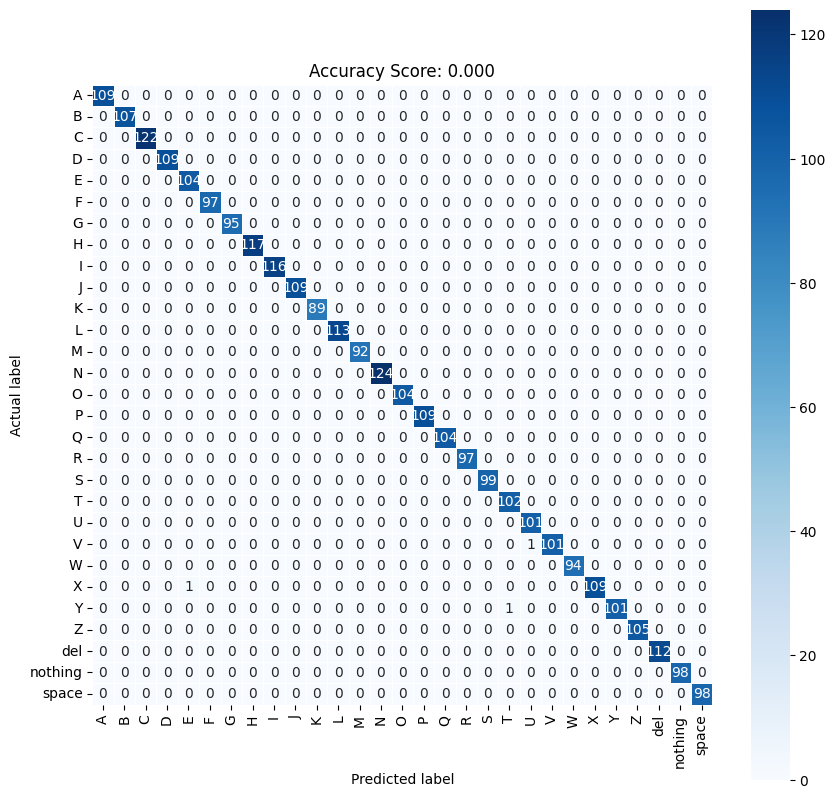

In [144]:
# Generate a confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues',
            xticklabels=test_dataset.classes,
            yticklabels=test_dataset.classes)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {:.3f}'.format(np.mean(all_preds == all_labels)))
plt.show()



Using a VGG16 model for our tasks can be an excellent choice,because we're looking for a model that strikes a balance between complexity and performance. VGG16 is well-known for its depth and robustness in handling a wide range of image recognition tasks.below code shows how we can implement and train a VGG16 model using PyTorch, including modifications for custom class numbers29.

In [26]:
import torchvision.models as models
import torch.nn as nn

# Load pre-trained VGG16 model
model = models.vgg16(pretrained=True)

# Change the last layer for 29 classes
num_classes = 29
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 198MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [27]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Early stopping parameters
early_stopping_patience = 5
best_val_accuracy = 0
epochs_no_improve = 0


In [28]:
history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': []
}

num_epochs = 20

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    running_corrects = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        _, preds = torch.max(outputs, 1)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = running_corrects.double() / total
    history['train_loss'].append(epoch_loss)
    history['train_acc'].append(epoch_acc.item())

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_corrects = 0

    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)

            val_loss += loss.item() * images.size(0)
            val_corrects += torch.sum(preds == labels.data)

        val_loss /= total
        val_acc = val_corrects.double() / total
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc.item())

        # Early stopping logic
        if val_acc > best_val_accuracy:
            best_val_accuracy = val_acc
            torch.save(model.state_dict(), 'best_model.pth')
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= early_stopping_patience:
                print("Early stopping")
                break

    print(f'Epoch {epoch+1}/{num_epochs} - Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')


Epoch 1/20 - Train Loss: 3.3755, Train Acc: 0.0348, Val Loss: 0.7221, Val Acc: 0.0076
Epoch 2/20 - Train Loss: 3.3706, Train Acc: 0.0325, Val Loss: 0.7218, Val Acc: 0.0079
Epoch 3/20 - Train Loss: 3.3696, Train Acc: 0.0330, Val Loss: 0.7219, Val Acc: 0.0068
Epoch 4/20 - Train Loss: 3.3693, Train Acc: 0.0344, Val Loss: 0.7220, Val Acc: 0.0068
Epoch 5/20 - Train Loss: 3.3698, Train Acc: 0.0344, Val Loss: 0.7220, Val Acc: 0.0075
Epoch 6/20 - Train Loss: 3.3694, Train Acc: 0.0352, Val Loss: 0.7218, Val Acc: 0.0071
Early stopping


**Plotting the History<br>**
After training, you can plot the training and validation loss and accuracy

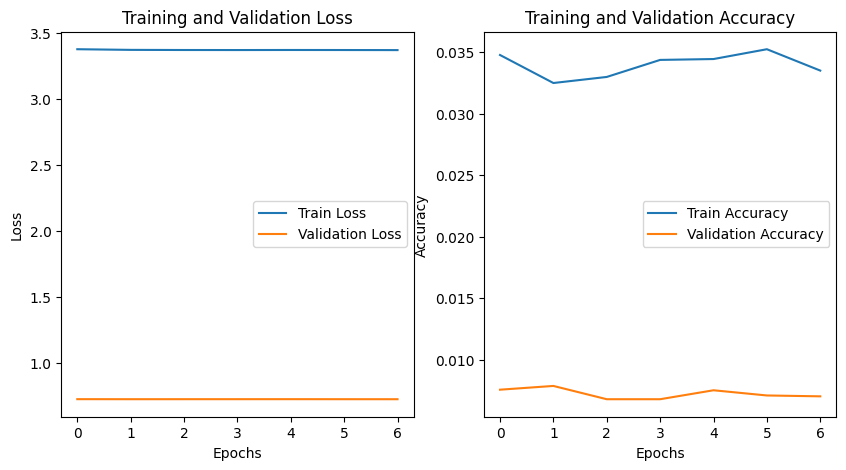

In [29]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Evaluate the VGG16 Model**
Now, lets calculate accuracy and other metrics on the test set

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import torch
import numpy as np

correct = 0
total = 0
all_preds = []
all_targets = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to('cuda' if torch.cuda.is_available() else 'cpu'), labels.to('cuda' if torch.cuda.is_available() else 'cpu')
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())
        all_targets.extend(labels.cpu().numpy())

accuracy = correct / total
print(f'Accuracy on the test images: {accuracy:.2f}')

# Detailed classification report
print(classification_report(all_targets, all_preds, target_names=test_dataset.classes))


Accuracy on the test images: 0.04
              precision    recall  f1-score   support

           A       0.00      0.00      0.00       300
           B       0.00      0.00      0.00       313
           C       0.00      0.00      0.00       347
           D       0.00      0.00      0.00       305
           E       0.00      0.00      0.00       328
           F       0.00      0.00      0.00       304
           G       0.00      0.00      0.00       315
           H       0.00      0.00      0.00       311
           I       0.00      0.00      0.00       344
           J       0.00      0.00      0.00       322
           K       0.00      0.00      0.00       287
           L       0.00      0.00      0.00       329
           M       0.00      0.00      0.00       305
           N       0.00      0.00      0.00       342
           O       0.00      0.00      0.00       314
           P       0.00      0.00      0.00       319
           Q       0.00      0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


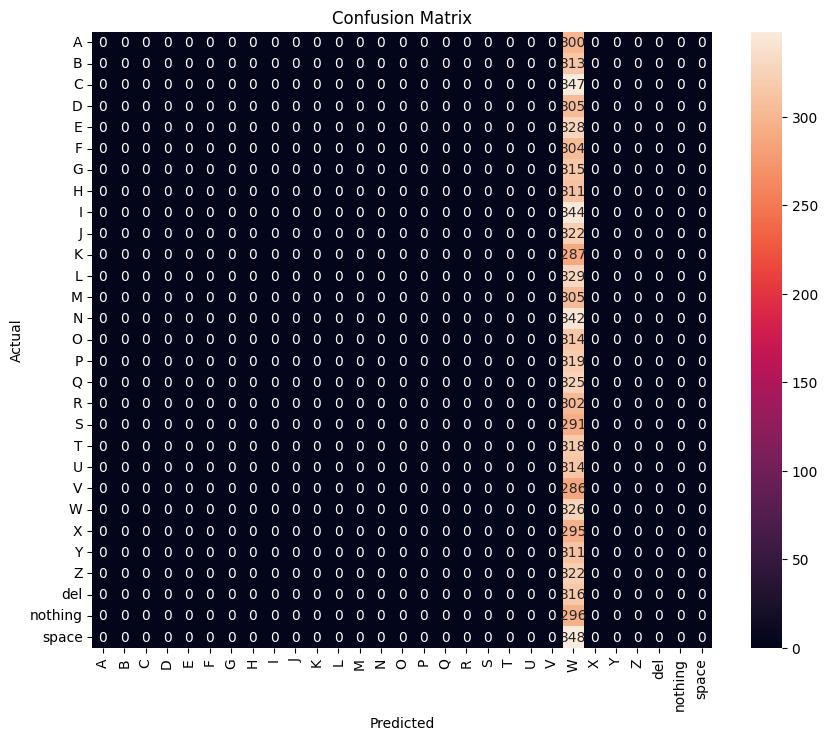

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(all_targets, all_preds)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Achieving a very low accuracy of just 4% with a VGG16 model on the test images suggests that there could be significant issues either with how the model is configured or how the data is being processed and fed into the model. This could be due to a variety of factors such as improper preprocessing of images, incorrect resizing, or normalization not aligning with what VGG16 expects (i.e., using the specific means and standard deviations of the ImageNet dataset).

## Summery<br>
This notebook has embarked on an explorative journey from data handling and preprocessing to training two distinctly different models: the Vision Transformer (ViT) and VGG16, providing a comprehensive look at their performance on an image classification task.

**Data Preparation**: The process began with careful preparation of the dataset, which involved normalization, resizing, and augmenting the images to ensure they are suitable for model input. This is crucial as proper image preprocessing can significantly impact model performance. The data was then split into training, validation, and testing sets to support robust model evaluation.

Model Training and Configuration:

**VGG16**: Initially, the VGG16 model, a traditional convolutional neural network known for its depth and robust feature extraction capabilities, was configured. It was modified to cater to the specific number of classes in the dataset (29 classes). Despite its widespread success on various tasks, VGG16 achieved very low accuracy in this instance, suggesting potential issues with model configuration, training process, or data preparation.
Vision Transformer (ViT): In contrast, the Vision Transformer was also trained, which uses a different approach by treating image patches as sequences, akin to handling words in text using attention mechanisms. This model typically excels when trained on large datasets or can leverage extensive pre-training.
Comparison and Analysis:

The stark difference in performance between VGG16 and ViT highlights the importance of model choice based on the specific characteristics of the dataset and task. ViT's ability to capture complex patterns and relationships between distant parts of an image might give it an edge for certain types of image data, especially those where contextual understanding is crucial.
The VGG16's poor performance could stem from several factors such as inadequate training epochs, improper parameter tuning, or suboptimal data preprocessing. This suggests that not only the choice of model but also the tuning and setup significantly influence the outcomes.
**Conclusion:**
This exploration underscores the necessity of aligning the model architecture with the dataset's nature and the task requirements. While traditional CNNs like VGG16 are powerful, they may not always match the performance of newer architectures like ViT, especially in scenarios involving large-scale or complex image data. The analysis also stresses the importance of meticulous data preprocessing, strategic model tuning, and the need for rigorous evaluation through systematic training and validation processes. Understanding why certain models underperform—whether due to technical misconfigurations or fundamental limitations—is crucial for refining model deployments and achieving optimal results.